**Regression Problem**

**Importing the Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'Gemini_BTCUSD.csv'
btc_data = pd.read_csv(file_path, skiprows=1)

**Data PreProcessing**

In [2]:
btc_data.columns = ['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume BTC', 'Volume USD']
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

In [3]:
print(btc_data['Date'])

0       2023-07-24 23:00:00
1       2023-07-24 22:00:00
2       2023-07-24 21:00:00
3       2023-07-24 20:00:00
4       2023-07-24 19:00:00
                ...        
68307   2015-10-08 17:00:00
68308   2015-10-08 16:00:00
68309   2015-10-08 15:00:00
68310   2015-10-08 14:00:00
68311   2015-10-08 13:00:00
Name: Date, Length: 68312, dtype: datetime64[ns]


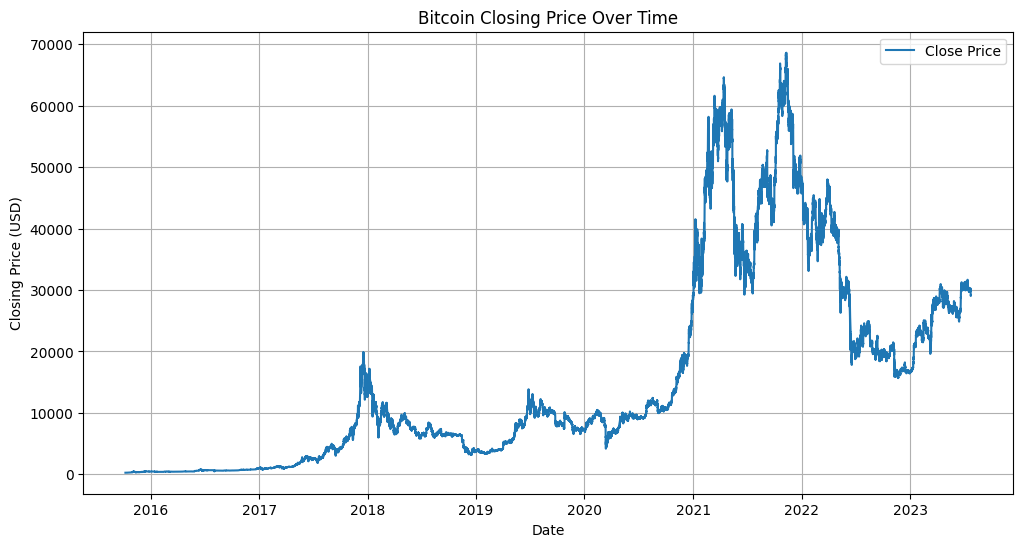

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


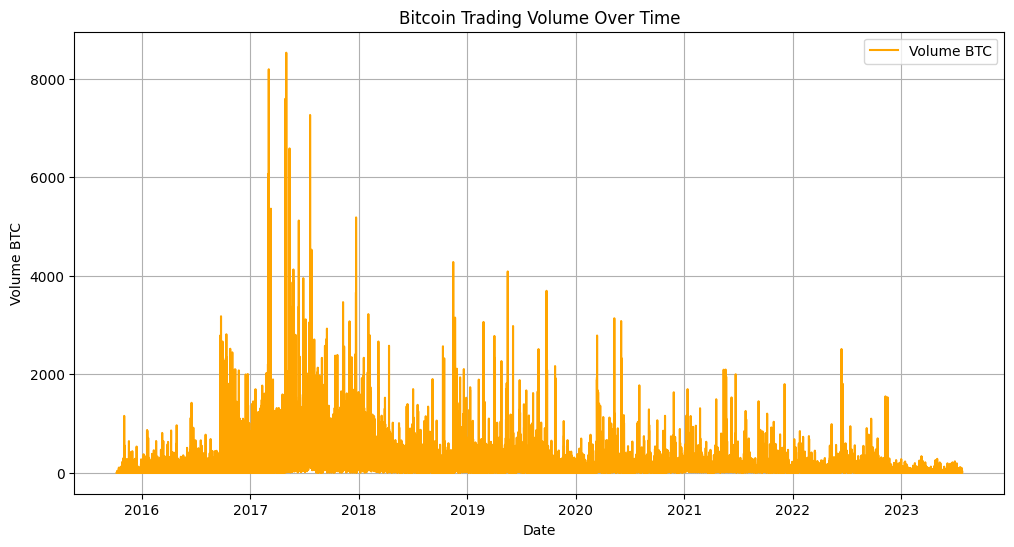

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Volume BTC'], label='Volume BTC', color='orange')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume BTC')
plt.legend()
plt.grid(True)
plt.show()

**Feature Terms Inclusion(SMA-10 and 30 days, EMA-10 and 30 days,Roc,VWap)**

In [6]:
btc_data['SMA_10'] = btc_data['Close'].rolling(window=10).mean()
btc_data['SMA_30'] = btc_data['Close'].rolling(window=30).mean()

In [7]:
print(btc_data['SMA_10'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
68307    243.964
68308    244.029
68309    244.161
68310    244.301
68311    244.406
Name: SMA_10, Length: 68312, dtype: float64


In [8]:
print(btc_data['SMA_30'])

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
68307    244.130333
68308    244.092333
68309    244.076667
68310    243.911000
68311    243.942333
Name: SMA_30, Length: 68312, dtype: float64


In [9]:
btc_data['EMA_10'] = btc_data['Close'].ewm(span=10, adjust=False).mean()
btc_data['EMA_30'] = btc_data['Close'].ewm(span=30, adjust=False).mean()

In [10]:
btc_data['RoC_10'] = btc_data['Close'].pct_change(periods=10)
btc_data['VWAP'] = (btc_data['Volume USD'] / btc_data['Volume BTC']).fillna(0)
print(btc_data.head())

            Unix                Date   Symbol      Open      High       Low  \
0  1690239600000 2023-07-24 23:00:00  BTC/USD  29161.82  29199.99  29161.82   
1  1690236000000 2023-07-24 22:00:00  BTC/USD  29167.91  29192.63  29139.17   
2  1690232400000 2023-07-24 21:00:00  BTC/USD  29149.01  29186.00  29118.20   
3  1690228800000 2023-07-24 20:00:00  BTC/USD  29111.09  29154.63  29097.24   
4  1690225200000 2023-07-24 19:00:00  BTC/USD  29114.34  29153.00  29098.46   

      Close  Volume BTC    Volume USD  SMA_10  SMA_30        EMA_10  \
0  29180.00    5.228109  1.525562e+05     NaN     NaN  29180.000000   
1  29161.82   37.308398  1.087981e+06     NaN     NaN  29176.694545   
2  29167.91    4.429061  1.291864e+05     NaN     NaN  29175.097355   
3  29149.01   11.999466  3.497726e+05     NaN     NaN  29170.354200   
4  29111.09   17.364420  5.054972e+05     NaN     NaN  29159.578891   

         EMA_30  RoC_10      VWAP  
0  29180.000000     NaN  29180.00  
1  29178.827097     NaN  2

**PreProcessed Dataset**

In [11]:
btc_data.to_csv('processed_BTC_data.csv', index=False)

**Model Training**

In [12]:
dataset = pd.read_csv('processed_BTC_data.csv')
dataset.dropna(inplace=True)
print(dataset.shape)
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)

(68283, 15)
(68283, 11)
(68283,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)

(54626, 11)
(54626,)


In [15]:
print(X_test.shape)
print(y_test.shape)

(13657, 11)
(13657,)


In [16]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[39905.4  40019.07]
 [26734.2  26823.21]
 [27504.3  27604.43]
 ...
 [ 7810.95  7872.85]
 [19069.22 19172.5 ]
 [ 9965.18  9969.91]]


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9969532735575654


**Classification Model<Starts Here>**

**Imporing the Required libraries**

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('characters_dataset.csv', header=None)
data.columns = ['Character', 'Universe', 'Strength', 'Speed', 'Intelligence', 'Special Abilities', 'Weaknesses', 'Battle Outcome']

**Data Preprocessing**

In [19]:
print(data['Strength'].unique())
print(data['Speed'].unique())
print(data['Intelligence'].unique())

['7' '4' '8' '5' nan '3' '6' '2' '1' '10' '9' 'value' 'values']
['8' '7' '6' '9' '2' '5' '4' '3' nan '1' '10' 'value']
[ 3.  9.  5. 10.  2.  7.  4.  1.  6. nan  8.]


In [20]:
data['Strength'] = pd.to_numeric(data['Strength'], errors='coerce')
data['Speed'] = pd.to_numeric(data['Speed'], errors='coerce')
data['Intelligence'] = pd.to_numeric(data['Intelligence'], errors='coerce')

In [21]:
print(data.isnull().sum())

Character             2
Universe             13
Strength             14
Speed                12
Intelligence          4
Special Abilities    14
Weaknesses            8
Battle Outcome        1
dtype: int64


In [22]:
strength_median = int(data['Strength'].median())
speed_median = int(data['Speed'].median())
intelligence = int(data['Intelligence'].median())
data['Strength'].fillna(strength_median, inplace=True)
data['Speed'].fillna(speed_median, inplace=True)
data['Intelligence'].fillna(speed_median, inplace=True)

In [23]:
print(data.isnull().sum())

Character             2
Universe             13
Strength              0
Speed                 0
Intelligence          0
Special Abilities    14
Weaknesses            8
Battle Outcome        1
dtype: int64


In [24]:
data.head(15)

,Character,Universe,Strength,Speed,Intelligence,Special Abilities,Weaknesses,Battle Outcome
0,Wonder Woman,Marvel,7.0,8.0,3.0,Telekinesis,Kryptonite,0.0
1,Iron Man,Marvel,4.0,7.0,9.0,Telekinesis,Kryptonite,0.0
2,Iron Man,DC Comics,8.0,7.0,5.0,Telekinesis,Magic,0.0
3,Spider-Man,DC Comics,5.0,6.0,10.0,Telekinesis,Kryptonite,0.0
4,Flash,Marvel,7.0,6.0,2.0,Invisibility,Magic,0.0
5,Spider-Man,DC Comics,5.0,9.0,7.0,Invisibility,Wooden Stake,1.0
6,Wonder Woman,Marvel,3.0,6.0,2.0,Super Strength,Silver,1.0
7,Thor,DC Comics,7.0,2.0,4.0,Invisibility,Magic,1.0
8,Batman,DC Comics,8.0,2.0,7.0,Flight,Silver,0.0
9,Iron Man,DC Comics,5.0,5.0,4.0,Flight,Wooden Stake,0.0


*Label encoding*

In [25]:
label_encoder = LabelEncoder()
data['Character'] = label_encoder.fit_transform(data['Character'])
data['Universe'] = label_encoder.fit_transform(data['Universe'])
data['Special Abilities'] = label_encoder.fit_transform(data['Special Abilities'])
data['Weaknesses'] = label_encoder.fit_transform(data['Weaknesses'])

In [26]:
print(data['Character'].unique())
print(data['Universe'].unique())
print(data['Special Abilities'].unique())
print(data['Weaknesses'].unique())

[7 3 4 2 6 0 5 1 8]
[2 1 3 0]
[4 2 3 1 5 0]
[0 1 3 2 4]


In [27]:
data.isnull()

,Character,Universe,Strength,Speed,Intelligence,Special Abilities,Weaknesses,Battle Outcome
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False


In [28]:
data.dropna(inplace=True)

In [29]:
print(data.isnull().sum())

Character            0
Universe             0
Strength             0
Speed                0
Intelligence         0
Special Abilities    0
Weaknesses           0
Battle Outcome       0
dtype: int64


In [30]:
data.shape

(498, 8)

In [31]:
data.head(15)

,Character,Universe,Strength,Speed,Intelligence,Special Abilities,Weaknesses,Battle Outcome
0,7,2,7.0,8.0,3.0,4,0,0.0
1,3,2,4.0,7.0,9.0,4,0,0.0
2,3,1,8.0,7.0,5.0,4,1,0.0
3,4,1,5.0,6.0,10.0,4,0,0.0
4,2,2,7.0,6.0,2.0,2,1,0.0
5,4,1,5.0,9.0,7.0,2,3,1.0
6,7,2,3.0,6.0,2.0,3,2,1.0
7,6,1,7.0,2.0,4.0,2,1,1.0
8,0,1,8.0,2.0,7.0,1,2,0.0
9,3,1,5.0,5.0,4.0,1,3,0.0


**Model Training**

In [32]:
X = data.drop('Battle Outcome', axis=1)
y = data['Battle Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 7)
(100, 7)
(398,)
(100,)


In [34]:
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)

Character              int64
Universe               int64
Strength             float64
Speed                float64
Intelligence         float64
Special Abilities      int64
Weaknesses             int64
dtype: object
Character              int64
Universe               int64
Strength             float64
Speed                float64
Intelligence         float64
Special Abilities      int64
Weaknesses             int64
dtype: object
float64
float64


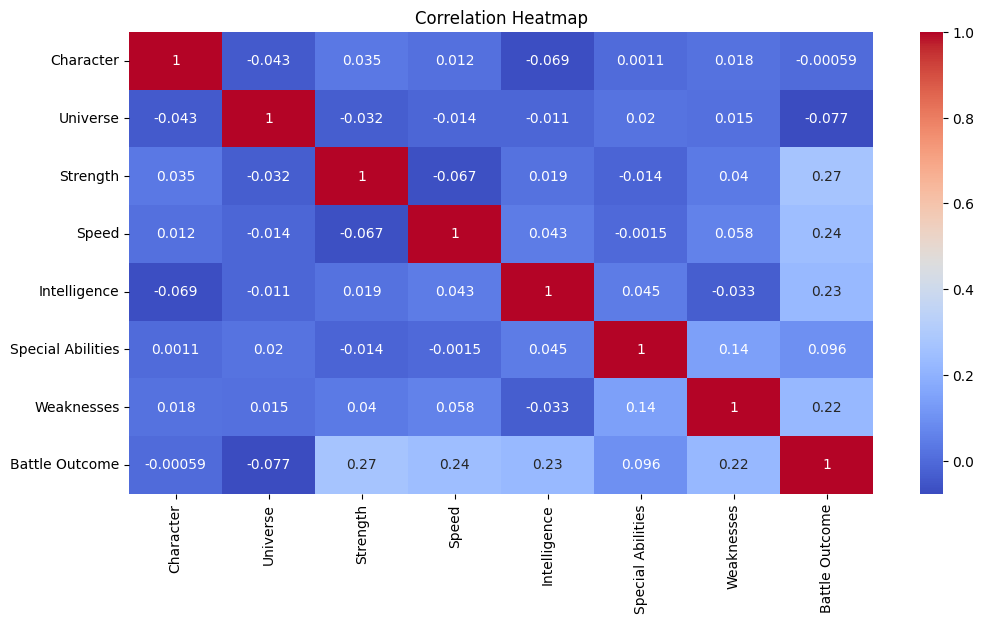

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Simple Neural Network Model**

In [36]:
# training and testing data to tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [37]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=10, validation_data=(X_test_tensor, y_test_tensor))

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8392 - val_loss: 0.7246 - val_accuracy: 0.7300
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8593 - val_loss: 0.7316 - val_accuracy: 0.7500
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8543 - val_loss: 0.8122 - val_accuracy: 0.7400
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.8593 - val_loss: 0.7855 - val_accuracy: 0.7500
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3416 - accuracy: 0.8291 - val_loss: 0.7014 - val_accuracy: 0.7500
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8568 - val_loss: 0.7982 - val_accuracy: 0.7400
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8593 - val_loss: 0.7518 - val_accuracy: 0.7600
Epoch 8/50
40/40 [==

In [45]:
nn_predictions = (model.predict(X_test_tensor) > 0.5).astype("int32")
print('Neural Network Classification Report:')
print(classification_report(y_test, nn_predictions))
print('Neural Network Confusion Matrix:')
print(confusion_matrix(y_test, nn_predictions))

4/4 [==============================] - 0s 3ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.81        68
         1.0       0.61      0.44      0.51        32

    accuracy                           0.73       100
   macro avg       0.69      0.65      0.66       100
weighted avg       0.72      0.73      0.72       100

Neural Network Confusion Matrix:
[[59  9]
 [18 14]]


In [46]:
nn_predictions = (model.predict(X_test_tensor) > 0.5).astype("int32")
print('Neural Network Classification Report:')
print(classification_report(y_test, nn_predictions))
print('Neural Network Confusion Matrix:')
print(confusion_matrix(y_test, nn_predictions))

4/4 [==============================] - 0s 4ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.81        68
         1.0       0.61      0.44      0.51        32

    accuracy                           0.73       100
   macro avg       0.69      0.65      0.66       100
weighted avg       0.72      0.73      0.72       100

Neural Network Confusion Matrix:
[[59  9]
 [18 14]]


In [47]:
print(data['Character'].unique())
print(data['Universe'].unique())
print(data['Special Abilities'].unique())
print(data['Weaknesses'].unique())

[7 3 4 2 6 0 5 1 8]
[2 1 3 0]
[4 2 3 1 5 0]
[0 1 3 2 4]


In [48]:
test_case_1 = np.array([[3, 1, 8, 3, 4, 1, 0]], dtype=np.float32)  # Thor, DC Comics, Invisibility, Kryptonite
test_case_2 = np.array([[4, 0, 4, 6, 9, 3, 3]], dtype=np.float32)  # Batman, Marvel, Telekinesis, Silver

In [49]:
# Predictions using the neural network
nn_prediction_1 = (model.predict(test_case_1) > 0.5).astype("int32")
nn_prediction_2 = (model.predict(test_case_2) > 0.5).astype("int32")
print(f'Neural Network Prediction for Test Case 1: {nn_prediction_1[0][0]}')
print(f'Neural Network Prediction for Test Case 2: {nn_prediction_2[0][0]}')

1/1 [==============================] - 0s 23ms/step
Neural Network Prediction for Test Case 1: 0
Neural Network Prediction for Test Case 2: 0


**Gaussian Naive Bayes Model Training**

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [51]:
# Evaluation of Model
print('Gaussian Naive Bayes Classification Report:')
print(classification_report(y_test, gnb_predictions))
print('Gaussian Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, gnb_predictions))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        68
         1.0       0.81      0.53      0.64        32

    accuracy                           0.81       100
   macro avg       0.81      0.74      0.76       100
weighted avg       0.81      0.81      0.80       100

Gaussian Naive Bayes Confusion Matrix:
[[64  4]
 [15 17]]


In [52]:
#Predictions
gnb_prediction_1 = gnb.predict(test_case_1)
gnb_prediction_2 = gnb.predict(test_case_2)
print(f'Gaussian Naive Bayes Prediction for Test Case 1: {gnb_prediction_1[0]}')
print(f'Gaussian Naive Bayes Prediction for Test Case 2: {gnb_prediction_2[0]}')

Gaussian Naive Bayes Prediction for Test Case 1: 0.0
Gaussian Naive Bayes Prediction for Test Case 2: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [53]:
gnb_prediction = gnb.predict(X_test)
print('Gaussian Naive Bayes Classification Report:')
print(classification_report(y_test, gnb_prediction))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        68
         1.0       0.81      0.53      0.64        32

    accuracy                           0.81       100
   macro avg       0.81      0.74      0.76       100
weighted avg       0.81      0.81      0.80       100



**Accuracy Test**

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, gnb_prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.81
